<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/Module3_ProcteredOnlineExam_210824_Final_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 18

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


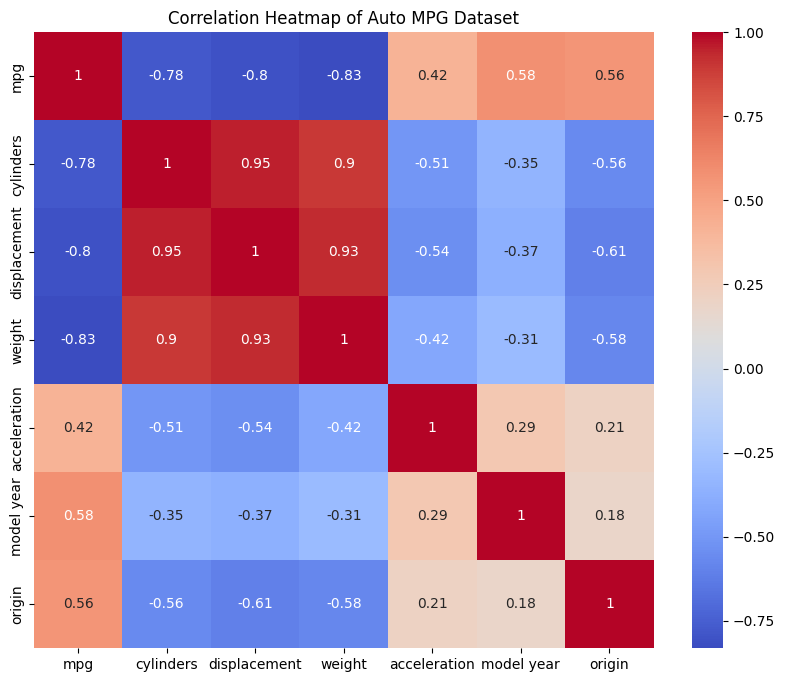

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
df = pd.read_csv("https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv")

# Drop non-numeric columns (e.g., 'car name')
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Print the correlation with 'mpg'
print(correlation_matrix['mpg'].sort_values(ascending=False))

# Create a seaborn heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Auto MPG Dataset')
plt.show()


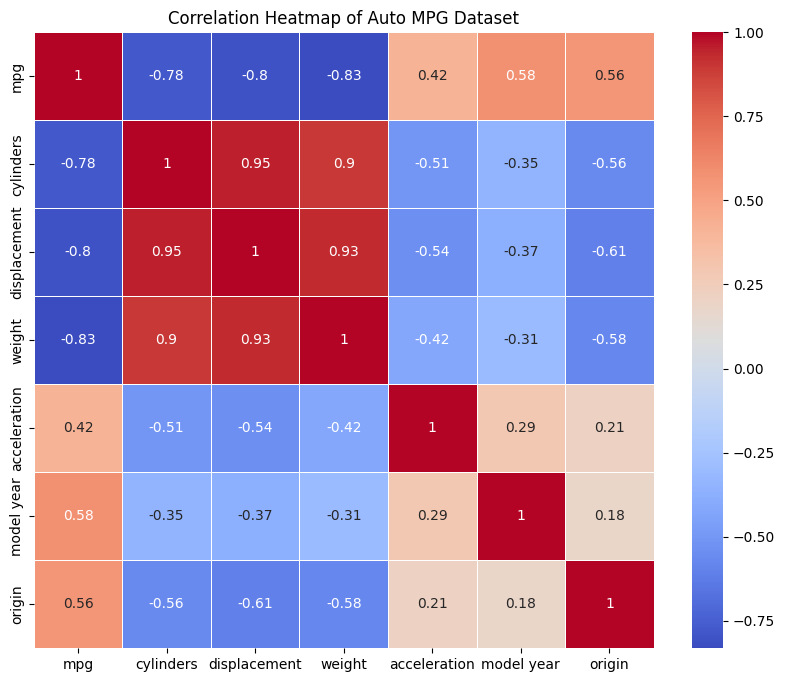

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Auto MPG dataset from the provided URL
url = "https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv"
df = pd.read_csv(url)

# Drop non-numeric columns (e.g., 'car name')
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a seaborn heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Auto MPG Dataset')
plt.show()


Question 19

In [3]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv"
df = pd.read_csv(url)

# Select the numeric columns (dropping non-numeric columns like 'car name')
df_numeric = df.select_dtypes(include=['number'])

# Define the features and target
X = df_numeric[['acceleration', 'displacement']]
y = df_numeric['mpg']

# Initialize and fit the XGBoost model with given hyperparameters
model = XGBRegressor(objective='reg:squarederror',
                     colsample_bytree=1,
                     learning_rate=0.1,
                     max_depth=5,
                     alpha=10,
                     n_estimators=10,
                     random_state=0)
model.fit(X, y)

# Predict the mpg values
y_pred = model.predict(X)

# Calculate the MSE for the first row
mse_first_row = mean_squared_error([y.iloc[0]], [y_pred[0]])
print(f"Mean Squared Error (MSE) of the first row: {mse_first_row:.4f}")


Mean Squared Error (MSE) of the first row: 0.0197


In [4]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv"
df = pd.read_csv(url)

# Display the first few rows to ensure the data is correct
print(df.head())

# Select the numeric columns (dropping non-numeric columns like 'car name')
df_numeric = df.select_dtypes(include=['number'])

# Display the correlation matrix to ensure the features are relevant
print(df_numeric.corr())

# Define the features and target
X = df_numeric[['acceleration', 'displacement']]
y = df_numeric['mpg']

# Display the first few rows of features and target to confirm
print(X.head())
print(y.head())

# Initialize and fit the XGBoost model with given hyperparameters
model = XGBRegressor(objective='reg:squarederror',
                     colsample_bytree=1,
                     learning_rate=0.1,
                     max_depth=5,
                     alpha=10,
                     n_estimators=10,
                     random_state=0)
model.fit(X, y)

# Predict the mpg values
y_pred = model.predict(X)

# Calculate the MSE for the first row
mse_first_row = mean_squared_error([y.iloc[0]], [y_pred[0]])
print(f"Mean Squared Error (MSE) of the first row: {mse_first_row:.4f}")


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932

Question 20

        Feature  Importance
2  displacement    0.580247
1  acceleration    0.296296
0        origin    0.123457


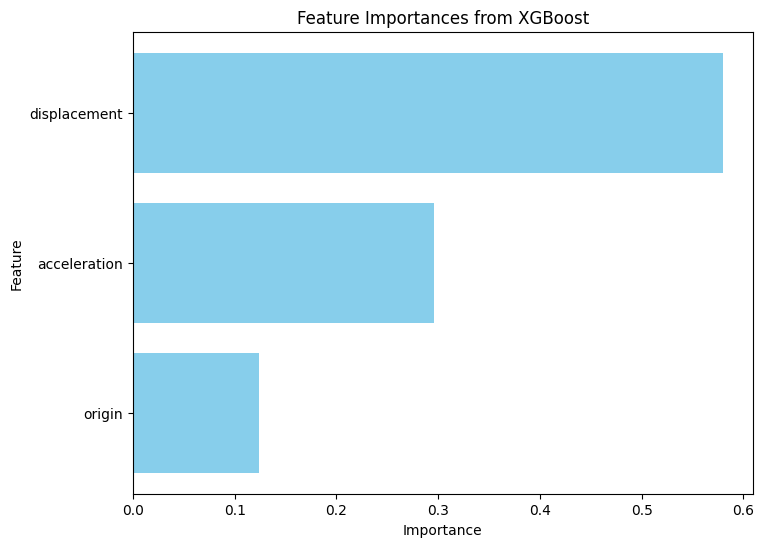

In [5]:
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
url = "https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv"
df = pd.read_csv(url)

# Select the numeric columns (dropping non-numeric columns like 'car name')
df_numeric = df.select_dtypes(include=['number'])

# Define the features and target
X = df_numeric[['origin', 'acceleration', 'displacement']]
y = df_numeric['mpg']

# Initialize and fit the XGBoost model with given hyperparameters
model = XGBRegressor(objective='reg:squarederror',
                     colsample_bytree=0.3,
                     learning_rate=0.1,
                     max_depth=5,
                     alpha=10,
                     n_estimators=10,
                     importance_type='weight',
                     random_state=0)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importance in order
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBoost')
plt.gca().invert_yaxis()  # To display the feature with the highest importance at the top
plt.show()
